In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("data.csv")
df = df[:-5]
df = df.rename(columns={"Unnamed: 1": "x", "Unnamed: 2": "y", "Unnamed: 3": "z"})
df = df.drop(columns=['Vectors'])
df.head(5)

,x,y,z
0,11.10,11.7,7.56
1,10.00,15.4,7.82
2,7.63,12.8,8.54
3,8.40,12.5,9.42
4,8.52,13.6,8.72


In [3]:
clust = pd.read_csv("data.csv")
clust = clust[-3:]
clust = clust.rename(columns={"Unnamed: 1": "x", "Unnamed: 2": "y", "Unnamed: 3": "z"})
clust = clust.drop(columns=['Vectors'])
clust.head()

,x,y,z
602,12.80,14.20,16.30
603,6.62,2.49,13.30
604,13.70,10.30,9.31


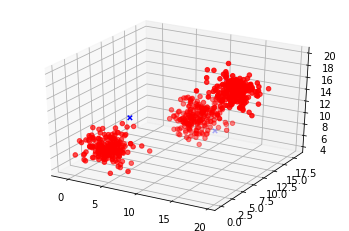

In [4]:
# Original plot of data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'], df['y'], df['z'], c = 'r')
ax.scatter(clust['x'], clust['y'], clust['z'], c = 'b', marker = 'x')

In [5]:
dataset = df.astype(float).values.tolist()
initial_centroids = clust.astype(float).values.tolist()

In [15]:
def kmeans(initial_centroids, vectors, max_iterations):
    
    centroids = initial_centroids
    # setup a dictionary to contain lists of points by with bin they belong to
    bins = {}
    for j in range(len(centroids)):
        bins[j] = []
    for i in range(max_iterations):
        # get distances from each point and each cluster. The min distance to a cluster is what that point is assigned
        for item in vectors:
            distances = []
            for y in range(len(centroids)):
                distances.append(np.linalg.norm(np.subtract(item, centroids[y])))
            binClass = distances.index(min(distances))
            bins[binClass].append(item)
        prevCentroids = centroids
        # average the points in each cluster to compute the new centroids
        for bucket in bins:
            centroids[bucket] = np.average(bins[bucket], axis = 0)
        # Check if the centroids were moved after the most recent iteration. If not, optimal solution is reached
        Optimal = True
        for centroid in range(len(centroids)):
            previousCentroid = prevCentroids[centroid]
            currentCentroid = centroids[centroid]
            if ((previousCentroid != currentCentroid).all()):
                Optimal = False
        if Optimal == True:
            break
        # clear out bins for next iteration with new centroid
        for j in range(len(centroids)):
            bins[j].clear
    retList = [centroids, bins]
    
    return retList

In [16]:
output = kmeans(initial_centroids, dataset, 1)
centroidOutput = output[0]
bin0 = pd.DataFrame(data=output[1][0], columns=["x", "y", "z"])
bin1 = pd.DataFrame(data=output[1][1], columns=["x", "y", "z"])
bin2 = pd.DataFrame(data=output[1][2], columns=["x", "y", "z"])

bin0

,x,y,z
0,15.3,12.30,17.3
1,15.5,9.88,17.6
2,15.5,10.90,15.0
3,13.3,10.70,16.2
4,15.1,7.94,17.4
...,...,...,...
195,17.2,10.40,14.7
196,16.0,13.50,15.8
197,14.4,13.20,15.0
198,14.7,13.00,16.0


In [17]:
bin1

,x,y,z
0,4.67,1.080,8.94
1,5.37,0.714,8.17
2,5.26,2.870,6.85
3,4.33,3.440,6.63
4,2.51,2.870,7.63
...,...,...,...
195,4.28,0.767,10.30
196,2.12,3.040,5.16
197,2.10,2.080,7.32
198,3.14,1.840,7.61


In [18]:
bin2

,x,y,z
0,11.10,11.7,7.56
1,10.00,15.4,7.82
2,7.63,12.8,8.54
3,8.40,12.5,9.42
4,8.52,13.6,8.72
...,...,...,...
195,9.14,13.4,6.91
196,9.74,16.4,9.74
197,9.41,12.8,6.08
198,7.35,14.3,8.84


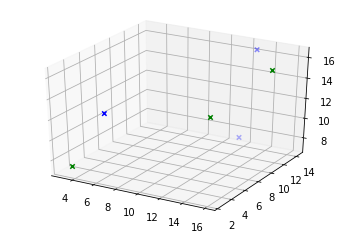

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(centroidOutput[0][0], centroidOutput[0][1], centroidOutput[0][2], c = 'g', marker = 'x')
ax.scatter(centroidOutput[1][0], centroidOutput[1][1], centroidOutput[1][2], c = 'g', marker = 'x')
ax.scatter(centroidOutput[2][0], centroidOutput[2][1], centroidOutput[2][2], c = 'g', marker = 'x')
ax.scatter(clust['x'], clust['y'], clust['z'], c = 'b', marker = 'x')

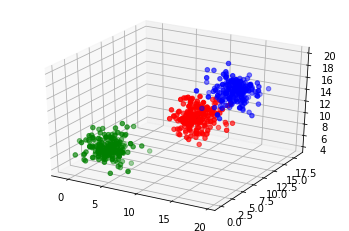

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bin0['x'], bin0['y'], bin0['z'], c = 'b')
ax.scatter(bin1['x'], bin1['y'], bin1['z'], c = 'g')
ax.scatter(bin2['x'], bin2['y'], bin2['z'], c = 'r')
ax.scatter(centroidOutput[0][0], centroidOutput[0][1], centroidOutput[0][2], c = 'g', marker = 'x')
ax.scatter(centroidOutput[1][0], centroidOutput[1][1], centroidOutput[1][2], c = 'g', marker = 'x')
ax.scatter(centroidOutput[2][0], centroidOutput[2][1], centroidOutput[2][2], c = 'g', marker = 'x')